<a href="https://colab.research.google.com/github/Kandeo/Core-Week-8/blob/main/Christine_Kandeo_Python_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Housing Price Predictive Analysis**

**Overview** 

Hass Consulting Company, a real estate leader with over 25 years of experience has tasked us to study the factors that affect housing prices using information on real estate properties that was collected over the past few months and create a Predictive Model that allows the company to accurately predict the sale of Housing prices upon being provided with the predictor variables. 

Dataset: http://bit.ly/IndependentProjectWeek7Dataset 

# **Defining the Question**

**Specific Data Analytics Question**

Building a model that predicts the price of a house from the housing data.

**Metrics for success**

Creating a model that has an Accuracy score of 60% and above when it comes to predicting the price of a house

**Understanding the Context**

The value of a house is primarily based on what a willing buyer in the market can pay. However, there are a number of factors that impact real estate prices, for example:  location, unit size, space, age, condition and upgrades. Examining the Housing data will help establish how different factors majorly impact the prices of dwelling units.

**Experimental Design**

1. Data Loading
 - Loading Dependencies
2. Data Cleaning
 - Handling missing/duplicate values
 - Dealing with irrelevant observations
 - Checking Outliers
3. Data Exploration
 - Univariate analysis
 - Bivariate analysis
  - Multivariate analysis
4. Modelling
 - Multicollinearity
 - Multiple Linear Regression
 - Quantile Regression
 - Ridge Regression
 - Lasso Regression
 - Elastic Net Regression
5. Performance Analysis
 -  Conclusions

**Data Relevance**

- **Price**  :        Price of the house {Prediction Target}
- **Bedrooms** :      Number of Bedrooms
- **Bathrooms** :     Number of Bathrooms
- **Sqft_living** :   Square feet area of living area
- **Sqft_lot**  :     Square feet area of the Lot
- **Floors** :        Total Floors in the house
- **Waterfront** :    House with a view to the Waterfront
- **View** :          Number of Views
- **Condition** :         How good the condition is overall
- **Grade** :         Grade given to the unit
- **Sqft_basement** : Square feet area of the basement
- **Yr_built** :      Year the house was built
- **Yr_renovated** :  Year the house was renovated
- **Zipcode** :       Zipcode of the house
- **Lat** :           Latitude Coordinates
- **Lon** :           Longitude Coordinates




# **Data Loading**

Importing Libraries

In [ ]:
#Importing dependencies:

#For Data manipulation and EDA:
import pandas as pd     
import seaborn as sb     
import seaborn as sns   
import numpy as np      
import matplotlib.pyplot as plt

#For Model training:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
from sklearn import metrics, linear_model
import statsmodels.api as sm

#For warnings:
import warnings
warnings.filterwarnings("ignore")


# **Data Cleaning**

Loading the Dataset

In [ ]:
#Loading and Previewing the Housing dataset:
Housing = pd.read_csv('house_data.csv')
Housing.head(4)


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000


In [ ]:
#Checking the shape of the dataset:
Housing.shape


(21613, 20)

Missing/duplicate values

In [ ]:
#Checking for any null values:
Housing.isnull().sum()


id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [ ]:
#Checking for duplicates:
Housing.duplicated().sum()    #3 duplicates identified

#Dropping duplicates:
Housing.drop_duplicates(inplace=True)
Housing.duplicated().sum()


0

Irrelevant Observations

In [ ]:
#Droppping observations not needed during analysis:
#The ID column does not provide any insights into what price a house will sell for hence an irrelevant observation:
Housing.drop(Housing.columns[[0]], axis=1, inplace = True)
Housing.head(4)


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000


Checking Outliers

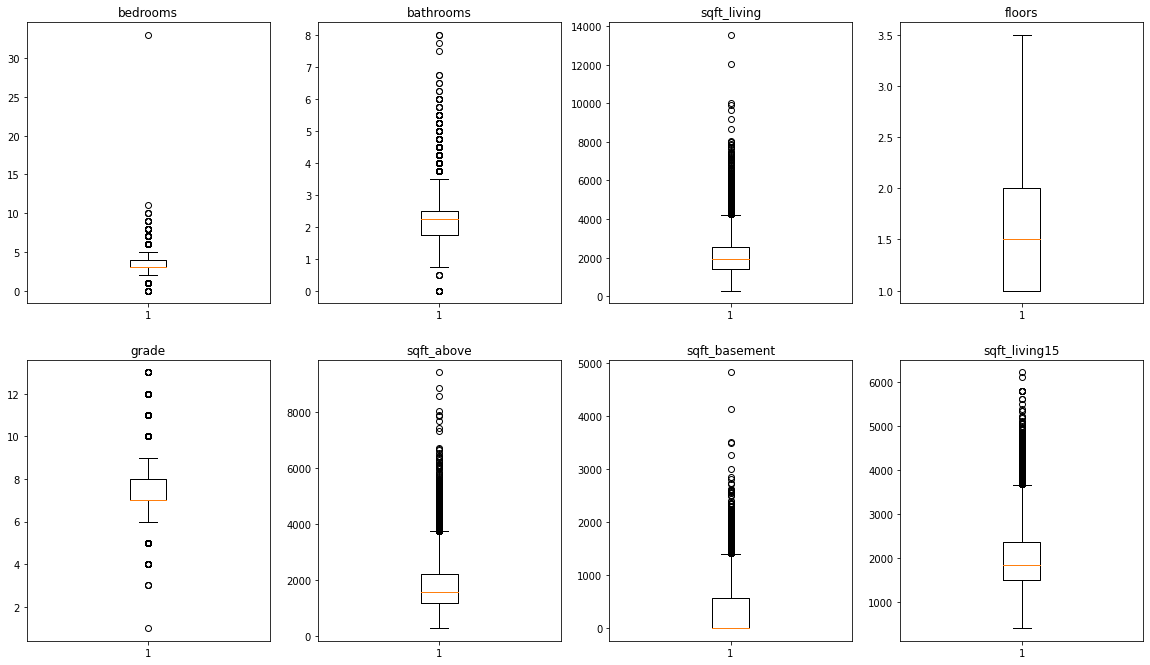

In [ ]:
# Checking for Outliers:
# Creating a dictionary with Features:
columns_dict = {'bedrooms': 1, 'bathrooms': 2, 'sqft_living': 3,'floors': 4,'grade': 5, 
                'sqft_above': 6,'sqft_basement': 7,'sqft_living15': 8}

plt.figure(figsize=(20,30))

#Visualizing the Information on  a boxplot:
for variable,i in columns_dict.items():
  plt.subplot(5,4,i)
  plt.boxplot(Housing[variable])
  plt.title(variable)
plt.show()


From the Plots above, Bedroom, Sqft_living and Sqft_basement seem to have distinct outliers calling for further investigations

In [ ]:
#Viewing the Descriptive summary to understand the extremities of the outliers in the above features:
Outlier_Check = Housing[['bedrooms','bathrooms','sqft_living', 'floors', 'grade', 'sqft_above', 'sqft_basement', 'sqft_living15']].copy()
Outlier_Check.describe() 


,bedrooms,bathrooms,sqft_living,floors,grade,sqft_above,sqft_basement,sqft_living15
count,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000
mean,3.370847,2.114739,2079.881212,1.494239,7.656779,1788.347894,291.533318,1986.518695
std,0.930110,0.770204,918.500299,0.539994,1.175500,828.138723,442.596699,685.425781
min,0.000000,0.000000,290.000000,1.000000,1.000000,290.000000,0.000000,399.000000
25%,3.000000,1.750000,1425.500000,1.000000,7.000000,1190.000000,0.000000,1490.000000
50%,3.000000,2.250000,1910.000000,1.500000,7.000000,1560.000000,0.000000,1840.000000
75%,4.000000,2.500000,2550.000000,2.000000,8.000000,2210.000000,560.000000,2360.000000
max,33.000000,8.000000,13540.000000,3.500000,13.000000,9410.000000,4820.000000,6210.000000


In [ ]:
#From the descriptive summary, the highest number of Bedrooms is 33:
#Investigating Bedrooms:
Housing.bedrooms.sort_values(ascending = False).head(4)


15870    33
8757     11
13314    10
19254    10
Name: bedrooms, dtype: int64

In [ ]:
#Viewing the information on the houses with 33 and 11 bedrooms:
print(Housing.loc[[15870]])
print(Housing.loc[[8757]])


          price  bedrooms  bathrooms  ...     long  sqft_living15  sqft_lot15
15870  640000.0        33       1.75  ... -122.331           1330        4700

[1 rows x 19 columns]
         price  bedrooms  bathrooms  ...     long  sqft_living15  sqft_lot15
8757  520000.0        11        3.0  ... -122.363           1420        4960

[1 rows x 19 columns]


In [ ]:
#Dropping the observations as its not logical having 33 bedrooms with 1.75 bathroms and sqft_living of 1330:
Housing = Housing[Housing.bedrooms <= 10]


In [ ]:
#Investigating Sqft_basement:
Housing.sqft_basement.sort_values(ascending = False).head(4)


8092     4820
12777    4130
15482    3500
7252     3480
Name: sqft_basement, dtype: int64

In [ ]:
#Investigating Sqft_living:
Housing.sqft_living.sort_values(ascending = False).head(4)


12777    13540
7252     12050
3914     10040
9254      9890
Name: sqft_living, dtype: int64

In [ ]:
#Viewing the information on the houses with the highest sqft_living:
print(Housing.loc[[12777]])
print(Housing.loc[[7252]])


           price  bedrooms  bathrooms  ...     long  sqft_living15  sqft_lot15
12777  2280000.0         7        8.0  ... -121.986           4850      217800

[1 rows x 19 columns]
          price  bedrooms  bathrooms  ...     long  sqft_living15  sqft_lot15
7252  7700000.0         6        8.0  ... -122.323           3940        8800

[1 rows x 19 columns]


In [ ]:
#For such a big living area of 13,540, the Price of 2,280,000 looks low:
#Dropping the observation on row 12,777 for both Sqft_living and Sqft_basement:
Housing = Housing[Housing.sqft_living < 13540]


For the remaining observations, no outlier is dropped as there's no basis to assume they are not valid entries

# **Exploratory Data Analysis**

1. **Univariate Analysis**

This analysis is performed with the aim of finding patterns that exist within the data

 The process shall involve analyzing the data to summarize their main characteristics. Distinguishing the Categorical Variables {Lack numerical meaning} and Numerical Variables {Continous in Nature};
 1. Categorical Variables: Waterfront, View, Condition, Zipcode, Grade and Year renovated
 2. Numerical Variables: Price, Bedroom, Bathroom, Sqft_living, Sqft_lot, Floors, Sqft_above, Sqft_Basement, Lat, Long, Sqft_living 15 and Sqft_lot15

Converting View and Year renovated to Categorial 0 and 1 where;

0 - Not viewed/ Not renovated

1 - Viewed/ Renovated

 - House Renovations

In [ ]:
#Converting Year renovated to an Object:
Housing['yr_renovated'] = Housing['yr_renovated'].astype('str')


In [ ]:
#Dividing into 0 and 1:
def Check(Housing):
   if Housing['yr_renovated'] == '0':
      return 0
   elif Housing['yr_renovated'] != '0':
      return 1
   else:
     return 'Missing'

Housing['yr_renovated'] = Housing.apply(Check, axis=1)
Housing.head(4)


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000


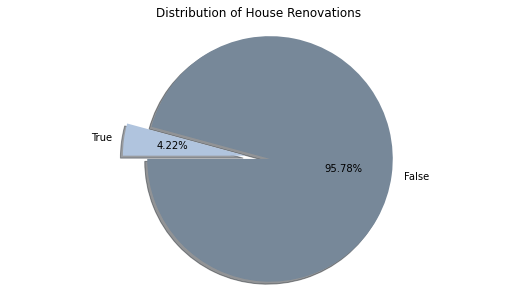

In [ ]:
#Viewing the Distribution of renovations done in the houses:
Renovations = Housing['yr_renovated'].value_counts()
Renovations
# 0: 20, 695     1:  912

#Visualising the information on a pie chart:
labels= ['False','True']
colors=['lightslategray', 'lightsteelblue']
plt.figure(figsize= (9, 5))
plt.title('Distribution of House Renovations')
plt.pie(Renovations,labels=labels, colors=colors, startangle=180, shadow=True,explode=(0.1, 0.1), autopct='%1.2f%%')
plt.axis('equal')
plt.show()


4% of the houses sampled have undergone renovations

 - Viewed dwelling units

In [ ]:
#Converting View column from integer to object:
Housing['view'] = Housing['view'].astype('str')


In [ ]:
#Dividing into 0 and 1:
def Check(Housing):
   if Housing['view'] == '0':
      return 0
   elif Housing['view'] != '0':
      return 1
   else:
     return 'Missing'

Housing['view'] = Housing.apply(Check, axis=1)
Housing.head(4)


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000


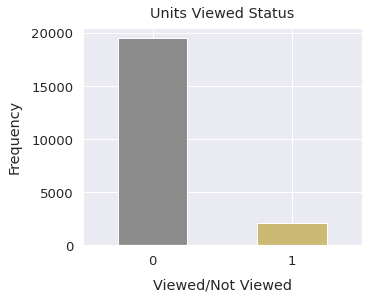

In [ ]:
#Viewing the Distribution:
View = Housing['view'].value_counts()
View
# 0: 19,485     1: 2,122

#Visualizing the information:
sns.set(font_scale=1.2)
Housing['view'].value_counts().plot(kind='bar', figsize=(5, 4), rot=0, color= ('C7','C8'))
plt.xlabel("Viewed/Not Viewed", labelpad=10)
plt.ylabel("Frequency", labelpad=10)
plt.title("Units Viewed Status", y=1.02);


Majority of the Houses have not been viewed

 -  Distribution of Houses with a view to a waterfront

In [ ]:
#To find out if majority of the houses a waterfront or not:
Waterfront = Housing['waterfront'].value_counts(normalize=True)*100
Waterfront
# 0: 21,444     1:  163


0    99.245615
1     0.754385
Name: waterfront, dtype: float64

99% of the Houses have no view to a waterfront

 -  Overall Condition of the Dwelling units

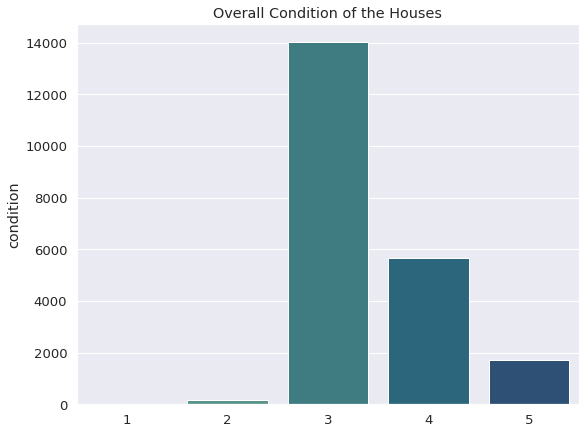

In [ ]:
#Viewing the overall condition of dwelling units:
Condition = Housing.condition.value_counts().sort_values(ascending=False).head(5)
Condition
# 3: 14,027   4: 5,678  5: 1,700  2: 172  1: 30

#Plotting observations:
plt.figure(figsize= (9,7))
plt.title('Overall Condition of the Houses')
sns.barplot(x=Condition.index, y=Condition, palette='crest');


Most Houses rank 3 in terms of the overall condition

 - Descriptive Summary

In [ ]:
#A descriptive summary of the numerical variables:
Housing.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.160700e+04,21607.000000,21607.000000,21607.000000,2.160700e+04,21607.000000,21607.000000,21607.000000,21607.000000,21607.000000,21607.000000,21607.000000,21607.000000,21607.000000,21607.000000,21607.000000,21607.000000,21607.000000,21607.000000
mean,5.400947e+05,3.368955,2.114442,2079.329523,1.509564e+04,1.494169,0.007544,0.098209,3.409404,7.656639,1788.001481,291.328042,1971.005878,0.042209,98077.944370,47.560038,-122.213908,1986.442773,12760.277734
std,3.672217e+05,0.906248,0.769188,915.222409,4.137813e+04,0.539912,0.086529,0.297604,0.650707,1.175193,826.545238,441.847041,29.371393,0.201069,53.508207,0.138577,0.140828,685.171090,27272.112119
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.215000e+05,3.000000,1.750000,1423.500000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.470850,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.620000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068850e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,10.000000,8.000000,12050.000000,1.651359e+06,3.500000,1.000000,1.000000,5.000000,13.000000,8860.000000,4820.000000,2015.000000,1.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


Findings:
- 96% of the houses have not undergone any renovations
- Most units had not been viewed at all
- Majority of the houses rank 3 in terms of overall condition
- The average number of bedrooms and bathrooms is 3 and 2 respectively.

Recommendation:
- Further analysis to be done to establish if there is any relationship between the variables.

2. **Bivariate Analysis**

This analysis aims to determine whether a statistical association exists between any two given variables.

 - Correlation Test

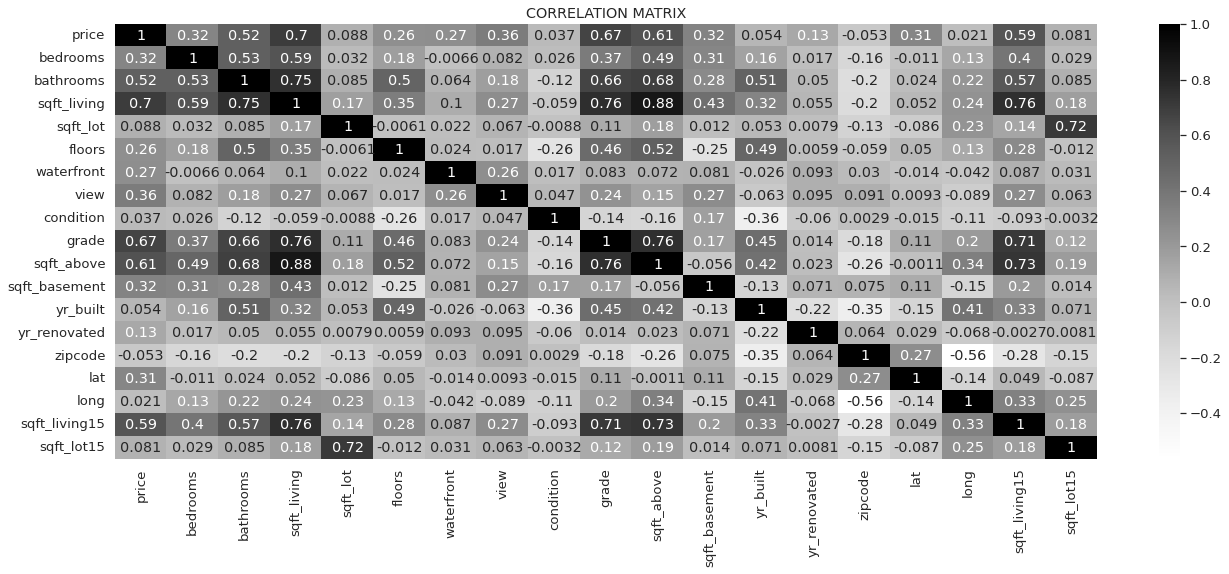

In [ ]:
#To check for correlation between the variables:
plt.figure(figsize = (22, 8))
Corr = Housing.corr()
sns.heatmap(Corr, cmap = 'Greys', annot = True)
plt.title('CORRELATION MATRIX', y=1.5)
plt.show()

From the Matrix above, the following features are highly correlated with price;
- Sqft_Living (0.70)
- Grade (0.67)
- Sqft_above (0.61)
- Sqft_living15 (0.59)
- Bathrooms (0.52)

Its Important to note that some of the features above are highly correlated to each other. Precisely;
- Bathroom and Sqft_living (0.75)
- Sqft_living and Grade (0.76)
- Sqft_living and Sqft_above ( 0.88)
- Sqft_living and Sqft_living15 (0.76)
- Grade and Sqft_above (0.76)
- Grade and Sqft_living15 (0.71)
- Sqft_above and Sqft_living15 (0.73)
- Sqft_lot15 and Sqft_lot (0.72)



In [ ]:
#Viewing how each feature is related to the price of a house:
Housing.corr()['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.702239
grade            0.667242
sqft_above       0.605086
sqft_living15    0.585039
bathrooms        0.524475
view             0.358857
sqft_basement    0.322678
bedrooms         0.315383
lat              0.306910
waterfront       0.266490
floors           0.256386
yr_renovated     0.126356
sqft_lot         0.088260
sqft_lot15       0.080963
yr_built         0.053811
condition        0.036527
long             0.021234
zipcode         -0.053093
Name: price, dtype: float64

A value greater than 0.7 indicates a strong positive relationship. From the observations above, Sqft_living makes a good predictor of housing price.

Sqft_lot, Yr_built, Long and Sqft_loft15 are poorly related to price.



*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


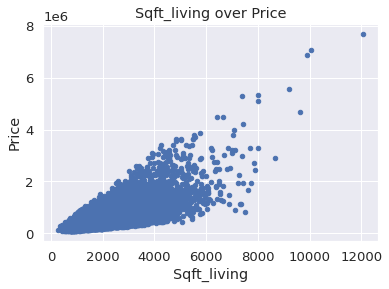

In [ ]:
#Plotting the relationship between Price and sqft_living:
Housing.plot(x = 'sqft_living', y = 'price', kind='scatter')
plt.title('Sqft_living over Price')
plt.xlabel('Sqft_living')
plt.ylabel('Price')
plt.show()

The Plot indicates a positive correlation. As the square footage of the house changes so does the Price. Hence their is a strong relationship between change in square footage and Price of a unit

 - Waterfront View and Overall condition ranking

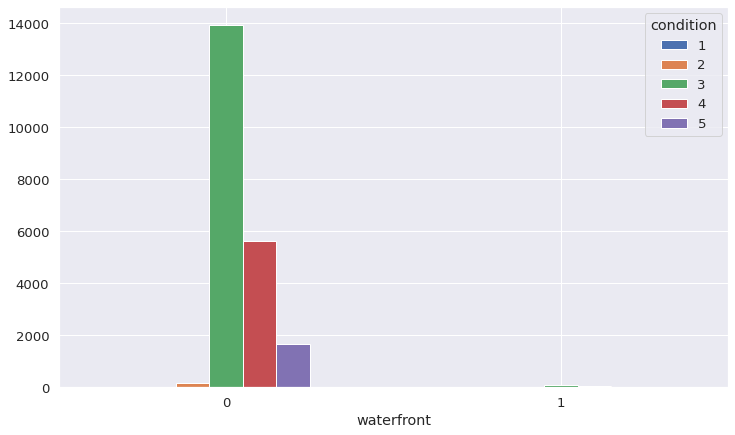

In [ ]:
#To understand the relationship between waterfront view and overall ranking:
C=pd.crosstab(index=Housing['waterfront'],columns=Housing['condition'])
C.plot.bar(figsize=(12,7), rot=0)

Most of the houses that lack a waterfront view have an overall ranking of 3

 - Renovations and Viewings

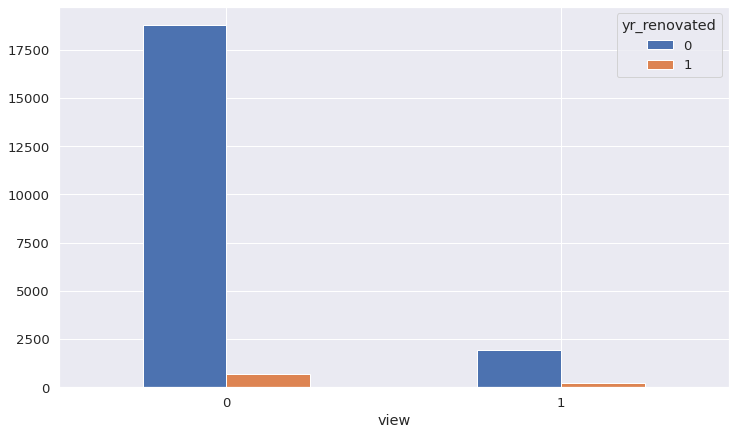

In [ ]:
#To understand the relationship between renovations and  viewership:
C=pd.crosstab(index=Housing['view'],columns=Housing['yr_renovated'])
C.plot.bar(figsize=(12,7), rot=0)

Houses that have no renovations done lacked viewings too

Recommendation;
- During Model training, some of the correlated features need to be dropped to avoid overfitting

**Multivariate Analysis**

 More input features often make a predictive modeling task more challenging to model. 
For the different dimensionality reduction techniques:
 - Linear discriminant analysis is related to classification problems
 - Principal Component Analysis is used on unsupervised learning

For the housing data, no dimensionality reduction is performed as most of the features are highly correlated hence can easily be dropped


# **Modelling**

In [ ]:
#Importing Libraries:
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV, ElasticNet, ElasticNetCV
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.formula.api as smf
import statsmodels.regression.quantile_regression as Q_reg
import scipy as sp

In [ ]:
#Creating the modelling dataframe: 
Housing1 = Housing[['price','bedrooms','bathrooms', 'sqft_living' ,'sqft_lot','floors','waterfront', 'view', 'condition','grade',
                 'sqft_above', 'sqft_basement','yr_built', 'yr_renovated', 'zipcode', 'lat','long', 'sqft_living15', 'sqft_lot15']].copy()
Housing1.head(4)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000


**Multicollinearity**

Multicollinearity occurs when the model includes multiple factors 
that are correlated to each other. It increases the standard errors of the coefficients making some variables insignificantly different form 0.


To avoid redundancy in information, 1 feature out of 2 or more that are highly correlated  need to be removed.
Since there is a high level of correlation between Price and Sqft_Living, investigating on how the other features relate to Sqft_living:

In [ ]:
#Viewing how each feature is related to Sqft_living:
Housing1.corr()['sqft_living'].sort_values(ascending=False)

sqft_living      1.000000
sqft_above       0.876159
grade            0.763628
sqft_living15    0.757110
bathrooms        0.753997
price            0.702239
bedrooms         0.592107
sqft_basement    0.432361
floors           0.353643
yr_built         0.318809
view             0.270218
long             0.240215
sqft_lot15       0.179845
sqft_lot         0.169570
waterfront       0.104252
yr_renovated     0.055170
lat              0.052288
condition       -0.058541
zipcode         -0.199910
Name: sqft_living, dtype: float64

Sqft_above, Grade, Sqft_living15, Bathrooms and Bedrooms have a strong relationship with Sqft_living. Since they tend to explain the same variance within the data, the features need to be dropped to avoid building a model with high multicollinearity.

Condition and Zipcode have a negative relation with Sqft_living. The 2 columns can also be dropped

In [ ]:
#Picking features to be used in the model:
Final = Housing1[['price','sqft_living', 'sqft_lot', 'waterfront', 'view', 'sqft_basement','yr_renovated', 'sqft_lot15']]
Final.head(2)

,price,sqft_living,sqft_lot,waterfront,view,sqft_basement,yr_renovated,sqft_lot15
0,221900.0,1180,5650,0,0,0,0,5650
1,538000.0,2570,7242,0,0,400,1,7639


Checking for multiple correlations using:

**Variance Inflation Factor**

In [ ]:
#The VIF estimates how much the variance of a regression coefficient is inflated due to multicollinearity in the model.
# 1 - Not correlated    1-5 - Moderately correlated   5 and Above - Highly correlated
#Checking the VIF:

independent1 = Final.drop('price', axis = 1)
Cor = independent1.corr()
pd.DataFrame(np.linalg.inv(Cor.values), index = Cor.index, columns=Cor.columns)


,sqft_living,sqft_lot,waterfront,view,sqft_basement,yr_renovated,sqft_lot15
sqft_living,1.319919,-0.099471,-0.038549,-0.188888,-0.511436,-0.013031,-0.145394
sqft_lot,-0.099471,2.072964,0.016471,-0.035982,0.046735,-0.000541,-1.469110
waterfront,-0.038549,0.016471,1.081994,-0.270701,0.008977,-0.073928,-0.020561
view,-0.188888,-0.035982,-0.270701,1.191101,-0.218793,-0.061221,-0.003734
sqft_basement,-0.511436,0.046735,0.008977,-0.218793,1.282257,-0.043825,0.054026
yr_renovated,-0.013031,-0.000541,-0.073928,-0.061221,-0.043825,1.016531,0.001330
sqft_lot15,-0.145394,-1.469110,-0.020561,-0.003734,0.054026,0.001330,2.080857


The more the VIF increases, the less reliable the regression results will be. A VIF above 5 indicates high correlation.
From the table above, the highest factor is that of 2.0

In [ ]:
# Alternaltevly, defining the independent variables:
Independents = Final[['sqft_living', 'sqft_lot', 'waterfront','view', 'sqft_basement','yr_renovated', 'sqft_lot15']]
  
# Creating the VIF dataframe:
vif_data = pd.DataFrame()
vif_data["feature"] = Independents.columns
  
#Calculating the VIF for each feature:
vif_data["VIF"] = [variance_inflation_factor(Independents.values, i)
                          for i in range(len(Independents.columns))]
vif_data.round(2)

,feature,VIF
0,sqft_living,2.15
1,sqft_lot,2.35
2,waterfront,1.09
3,view,1.31
4,sqft_basement,1.81
5,yr_renovated,1.06
6,sqft_lot15,2.53


None of the features above have a VIF greater than 4

**Model Training**

In [ ]:
#Creating a dataframe for from the Final Dataframe:
Model = Final[['price','sqft_living', 'sqft_lot', 'waterfront', 'view', 'sqft_basement','yr_renovated', 'sqft_lot15']].copy()
Model.head(4)

,price,sqft_living,sqft_lot,waterfront,view,sqft_basement,yr_renovated,sqft_lot15
0,221900.0,1180,5650,0,0,0,0,5650
1,538000.0,2570,7242,0,0,400,1,7639
2,180000.0,770,10000,0,0,0,0,8062
3,604000.0,1960,5000,0,0,910,0,5000


Label Encoding

In [ ]:
#Encoding the Categorical Variables to a machine readable format:
le = LabelEncoder()
Model['waterfront'] = le.fit_transform (Model['waterfront'])
Model['view'] = le.fit_transform (Model['view'])
Model['yr_renovated'] = le.fit_transform (Model['yr_renovated'])
Model.head(4)

,price,sqft_living,sqft_lot,waterfront,view,sqft_basement,yr_renovated,sqft_lot15
0,221900.0,1180,5650,0,0,0,0,5650
1,538000.0,2570,7242,0,0,400,1,7639
2,180000.0,770,10000,0,0,0,0,8062
3,604000.0,1960,5000,0,0,910,0,5000


1. **Multiple Linear Regression** {Baseline Model}

Multiple linear regression models the relationship between two or more features and a target by fitting a linear equation to observed data.

In [ ]:
#Creating the Variables:
X = Model.drop('price', axis=1)
y = Model['price']

#Splitting the dataset:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(17285, 7) (4322, 7) (17285,) (4322,)


In [ ]:
#Performing feature scaling:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#Model Selection:
model = LinearRegression()

#Fitting the model:
model.fit(X_train,y_train )

#Applying the trained model to make a prediction:
y_pred = model.predict(X_test)

In [ ]:
#Viewing the Predictions:
y_pred

array([279924.77349581, 585614.47567336, 395513.78246971, ...,
       475631.73832755, 367074.01144422, 849046.11501928])

In [ ]:
#Viewing the actual values:
y_test

9791      216500.0
10281     451000.0
19860     293467.0
20060     379950.0
21204    1060000.0
           ...    
17764     583500.0
13213     675000.0
8108      395000.0
19728     489000.0
16125     800000.0
Name: price, Length: 4322, dtype: float64

Performance Evaluation

In [ ]:
#Checking the coefficients:
Ref_Coef = model.coef_
Lin_Summ = pd.DataFrame(data =X.columns, columns =['Features'])
Lin_Summ['Coefficients'] = np.round(model.coef_, 5)
print(Lin_Summ)

#Checking for the MSE and Accuracy:
Lin = metrics.r2_score(y_test, y_pred)
print('Intercept: ', model.intercept_)
print('Mean squared error (MSE): %.5f' % mean_squared_error(y_test, y_pred ))
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred))  
print('Root Mean Squared Error (RMSE) :', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Accuracy', (model.score(X_test, y_test )* 100).round(2))


        Features  Coefficients
0    sqft_living  241815.35959
1       sqft_lot    1011.02781
2     waterfront   63613.57099
3           view   48616.81581
4  sqft_basement   -6943.88777
5   yr_renovated   23551.53024
6     sqft_lot15  -18722.14454
Intercept:  539627.6988140006
Mean squared error (MSE): 60074661794.77185
Mean Absolute Error (MAE): 163961.35447201607
Root Mean Squared Error (RMSE) : 245101.32964709075
Accuracy 55.3


**Findings and Recommendations**:

 - The sign of the Coefficient tells  whether there is a positive or negative correlation between the independent and the dependent variable. 
 
 A positive coefficient indicates that as the value of the independent variable increases, the mean of the dependent variable also tends to increase. A negative coefficient suggests that as the independent variable increases, the dependent variable tends to decrease.
 
 From the Coefficients above: Sqft_basement and Sqft_lot15 have negative coefficients suggesting an inverse relation

 - The high MSE value of 60,074,661,794 Suggests that the regression model is not a good fit since this metric evaluates how close estimates are to the actual value. The lower the value, the closer the estimate is to the actual figure

 - To discourage complexity in the model and improve accuracy, regularization is encouraged

**Residual plot**


In [ ]:
#To find the residual:
residuals = y_test-y_pred
residuals

#Describe the residual:
pd.DataFrame(residuals).describe()
residuals.mean()

4187.889071229548

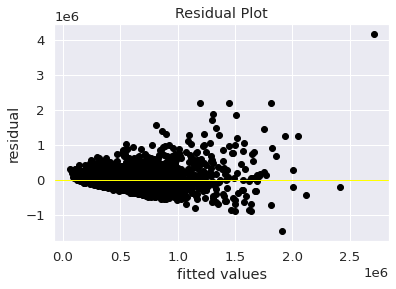

In [ ]:
#Plotting the residual plot: 
plt.scatter(y_pred, residuals, color='black')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='yellow', linewidth=1)
plt.title('Residual Plot')
plt.show()

Residuals are how much the predicted values differ from the actual values. It's calculated as actual values less the predicted values. 

From the Plot above: 

-  A clear pattern exists in the plot showing signs of non-linearity in the data.


**Bartlett's Test (heteroskedasticity testing)**

In [ ]:
#Using Barlett test to test if the variances are equal for all samples:
test_result, p_value = sp.stats.bartlett(y_pred, residuals)

degree_of_freedom = len(y_pred)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)

if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')


the variances are homogeneous!


The test checks that the assumption of equal variances is true before running certain statistical tests. 

From the test, the variances are homogeneous hence equal and the model does not need futher assessment

2. **Ridge Regression (L2 Regularization)**

This regression penalises the model based on the sum of the squared coefficient values. The more the alpha increases, the more the  coefficients shrink towards Zero but never Zero preventing them from being removed from the model.



In [ ]:
#Creating the Variables:
X = Model.drop('price', axis=1)
y = Model['price']

#Splitting the dataset:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(17285, 7) (4322, 7) (17285,) (4322,)


In [ ]:
#Choosing optimal parameters:
ridge = Ridge(normalize=True)

param_grid = [{'alpha':[1000, 100, 10, 1, 0.1, 0.01, 0.001]}]
               

#Creating grid search using 5_fold cross validation:
clf = GridSearchCV(ridge, param_grid = param_grid, cv=5, scoring = 'neg_mean_squared_error', n_jobs = 1, refit = True)

#Fitting the grid search:
best_clf = clf.fit(X_train, y_train)

#Predicting values based on the new parameters:
y_pred = best_clf.predict(X_test)

In [ ]:
#Checking the accuracy and the best hyperparameter:
print('Best Alpha:', best_clf.best_estimator_.get_params()['alpha'])
print('Mean squared error (MSE): %.5f' % mean_squared_error(y_test, y_pred ))

Best Alpha: 0.001
Mean squared error (MSE): 60075829033.04131


In [ ]:
#Model Selection using the Above parameters:
ridge=Ridge(normalize=True,alpha=0.001)

#Fitting the model:
ridge.fit(X_train,y_train )

Ridge(alpha=0.001, normalize=True)

In [ ]:
#Checking the coefficients:
Rid_Coef = model.coef_
Rid_Summ = pd.DataFrame(data =X.columns, columns =['Features'])
Rid_Summ['Coefficients'] = np.round(ridge.coef_, 5)
print(Rid_Summ)

#Checking for the MSE:
Ridg = metrics.r2_score(y_test, y_pred)
print('Intercept (Constant of the Model): ', ridge.intercept_)
print('Mean squared error (MSE): %.5f' % mean_squared_error(y_test, y_pred ))
print('Accuracy', ridge.score(X_test, y_test )* 100)

        Features  Coefficients
0    sqft_living     263.96010
1       sqft_lot       0.02379
2     waterfront  727512.18166
3           view  163568.94054
4  sqft_basement     -15.28471
5   yr_renovated  115677.23545
6     sqft_lot15      -0.65876
Intercept (Constant of the Model):  -23538.838728714385
Mean squared error (MSE): 60075829033.04131
Accuracy 55.29983892431749


 **Finding**:
 - Using the Linear model as the baseline, the Ridge MSE of 60,075,829,033 is higher. This suggests that the baseline is doing better than the ridge as the estimates are way further from the actual values. 

 - Being that Ridge does not remove variables with low relationships from the model, the coefficient of Sqft_ lot was brought close to zero. 

**Residual plot**

In [ ]:
#To find the residual:
residuals = y_test-y_pred
residuals

#Describe the residual:
pd.DataFrame(residuals).describe()
residuals.mean()

4192.353751676441

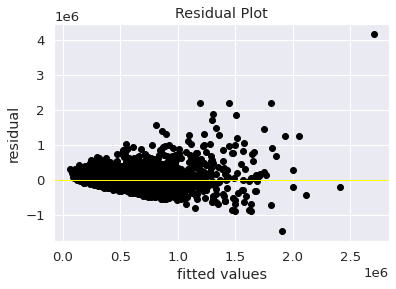

In [ ]:
#Plotting the residual plot: 
plt.scatter(y_pred, residuals, color='black')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='yellow', linewidth=1)
plt.title('Residual Plot')
plt.show()

**Bartlett's Test (heteroskedasticity testing)**

In [ ]:
#Using Barlett test to test if the variances are equal for all samples:
test_result, p_value = sp.stats.bartlett(y_pred, residuals)

degree_of_freedom = len(y_pred)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)

if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')


the variances are homogeneous!


The Residual plot and heteroskedasticity test results are similar to the baseline model

3. **Lasso Regression (L1 Regularization)**

This regression penalises the model based on sum of absolute coefficient values. Unlike ridge, lasso allows some coefficients to be minimised to zero completely removing the predictor from the model.

In [ ]:
#Creating the Variables:
X = Model.drop('price', axis=1)
y = Model['price']

#Splitting the dataset:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(17285, 7) (4322, 7) (17285,) (4322,)


In [ ]:
#Choosing optimal parameters:
lasso = Lasso(normalize=True)

param_grid = [{'alpha':[10, 1, 0.1, 0.01, 0.001, 0.0001]}]
               

#Creating grid search using 5_fold cross validation:
clf = GridSearchCV(ridge, param_grid = param_grid, cv=5, scoring = 'neg_mean_squared_error', n_jobs = 1, refit = True)

#Fitting the grid search:
best_clf = clf.fit(X_train, y_train)

#Predicting values based on the new parameters:
y_pred = best_clf.predict(X_test)

In [ ]:
#Checking the accuracy and the best hyperparameter:
print('Best Alpha:', best_clf.best_estimator_.get_params()['alpha'])
print('Mean squared error (MSE): %.5f' % mean_squared_error(y_test, y_pred ))

Best Alpha: 0.001
Mean squared error (MSE): 60075829033.04131


In [ ]:
#Model Selection using the Above parameters:
lasso=Lasso(normalize=True,alpha=0.001)

#Fitting the model:
lasso.fit(X_train,y_train )

Lasso(alpha=0.001, normalize=True)

In [ ]:
#Checking the coefficients:
Las_Coef =model.coef_
Las_Summ = pd.DataFrame(data =X.columns, columns =['Features'])
Las_Summ['Coefficients'] = np.round(lasso.coef_, 5)
print(Las_Summ)

#Checking for the MSE:
Las = metrics.r2_score(y_test, y_pred)
print('Intercept: ', lasso.intercept_)
print('Mean squared error (MSE): %.5f' % mean_squared_error(y_test, y_pred ))
print('Accuracy', lasso.score(X_test, y_test )* 100)

        Features  Coefficients
0    sqft_living     264.30174
1       sqft_lot       0.02389
2     waterfront  728006.55628
3           view  163559.39149
4  sqft_basement     -15.61201
5   yr_renovated  115746.30173
6     sqft_lot15      -0.66149
Intercept:  -24125.420600572834
Mean squared error (MSE): 60075829033.04131
Accuracy 55.30070809662801


**Finding**:
 - Comparing the lasso MSE of 60,075,829,033 , the baseline model still performs better. 
 - No variable has been completely set to 0. Sqft_lot is set to a 0.02 from 1011 in the baseline model. This suggests that the feature may not be good for the algorithm.

**Residual plot**

In [ ]:
#To find the residual:
residuals = y_test-y_pred
residuals

#Describe the residual:
pd.DataFrame(residuals).describe()
residuals.mean()

4192.353751676441

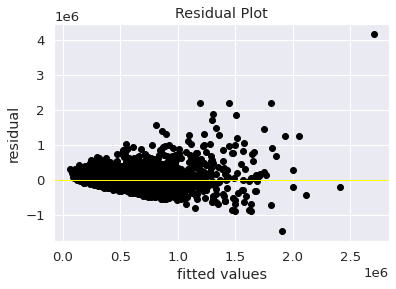

In [ ]:
#Plotting the residual plot: 
plt.scatter(y_pred, residuals, color='black')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='yellow', linewidth=1)
plt.title('Residual Plot')
plt.show()

**Bartlett's Test (heteroskedasticity testing)**

In [ ]:
#Using Barlett test to test if the variances are equal for all samples:
test_result, p_value = sp.stats.bartlett(y_pred, residuals)

degree_of_freedom = len(y_pred)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)

if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')


the variances are homogeneous!


The Residual plot and Bartletts test is similar to the ridge model

4. **Elastic Net Regression**

This regression includes both the ridge and lasso regularizers during training. This allows a balance of both penalites hence leading to better performance compared to a model with one penalty

In [ ]:
#Creating the Variables:
X = Model.drop('price', axis=1)
y = Model['price']

#Splitting the dataset:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(17285, 7) (4322, 7) (17285,) (4322,)


In [ ]:
#Choosing optimal parameters:
enet = ElasticNet(normalize=True)

param_grid = [{'alpha':[ 0.001, 0.01, 1, 10, 15, 30],
               'l1_ratio':[0, 0.2, 0.4, 0.6, 0.8, 1.0]
               }
              ]

#Creating grid search using 5_fold cross validation:
clf = GridSearchCV(enet, param_grid = param_grid, cv=5, scoring = 'neg_mean_squared_error', n_jobs = 1, refit = True)

#Fitting the grid search:
best_clf = clf.fit(X_train, y_train)

#Predicting values based on the new parameters:
y_pred = best_clf.predict(X_test)

In [ ]:
#Checking the accuracy and the best hyperparameter:
print('Best Alpha:', best_clf.best_estimator_.get_params()['alpha'])
print('Best L1_ratio:', best_clf.best_estimator_.get_params()['l1_ratio'])
print('Mean squared error (MSE): %.5f' % mean_squared_error(y_test, y_pred ))

Best Alpha: 1
Best L1_ratio: 1.0
Mean squared error (MSE): 60073999913.22037


In [ ]:
#Model Selection using the Above parameters:
elastic=ElasticNet(normalize=True,alpha=1,l1_ratio=1)

#Fitting the model:
elastic.fit(X_train,y_train )

ElasticNet(alpha=1, l1_ratio=1, normalize=True)

In [ ]:
#Checking the coeffiencts:
Elas_Coef =model.coef_
Elas_Summ = pd.DataFrame(data =X.columns, columns =['Features'])
Elas_Summ['Coefficients'] = np.round(elastic.coef_, 5)
print(Elas_Summ)

#Checking for the MSE:
Elas = metrics.r2_score(y_test, y_pred)
print('Intercept: ', elastic.intercept_)
print('Mean squared error (MSE): %.5f' % mean_squared_error(y_test, y_pred ))
print('Accuracy', elastic.score(X_test, y_test )* 100)

        Features  Coefficients
0    sqft_living     264.06894
1       sqft_lot       0.01260
2     waterfront  726893.77236
3           view  163176.91309
4  sqft_basement     -14.99734
5   yr_renovated  115152.96759
6     sqft_lot15      -0.64279
Intercept:  -23819.41933087469
Mean squared error (MSE): 60073999913.22037
Accuracy 55.301199903465644


**Finding**:
 - The Elastic net MSE of 60,073,999,913 is lower than the baseline model.This suggests that the elastic net model is doing better than the baseline.



**Residual plot**

In [ ]:
#To find the residual:
residuals = y_test-y_pred
residuals

#Describe the residual:
pd.DataFrame(residuals).describe()
residuals.mean()

4196.507168399823

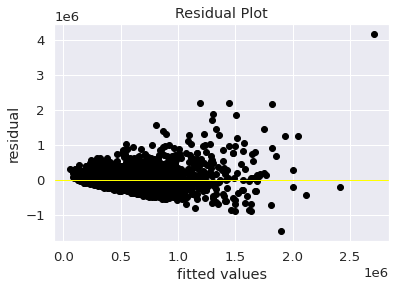

In [ ]:
#Plotting the residual plot: 
plt.scatter(y_pred, residuals, color='black')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='yellow', linewidth=1)
plt.title('Residual Plot')
plt.show()

**Bartlett's Test (heteroskedasticity testing)**

In [ ]:
#Using Barlett test to test if the variances are equal for all samples:
test_result, p_value = sp.stats.bartlett(y_pred, residuals)

degree_of_freedom = len(y_pred)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)

if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')

the variances are homogeneous!


5. **Quantile Regression**

Quantile regression is often used to model specific conditional quantiles of the response. Unlike the simple regression it does not assume a particular parametric distribution for the response, nor does it assume a constant variance for the response. It is therefore able to provide prediction intervals besides the mean predictions.

In [ ]:
#Creating the Variables:
X = Model.drop('price', axis=1)
y = Model['price']

#Splitting the dataset:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(17285, 7) (4322, 7) (17285,) (4322,)


In [ ]:
#Finding the regression coefficients for the conditioned median, 0.5 quantile:
mod = smf.quantreg('y ~ X', Model)
res = mod.fit(q=0.5)
res
#printng out the summary of our model:
print(res.summary())

                         QuantReg Regression Results                          
Dep. Variable:                      y   Pseudo R-squared:               0.2741
Model:                       QuantReg   Bandwidth:                   3.089e+04
Method:                 Least Squares   Sparsity:                    4.697e+05
Date:                Tue, 30 Nov 2021   No. Observations:                21607
Time:                        02:36:23   Df Residuals:                    21599
                                        Df Model:                            7
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.843e+04   4034.915      9.524      0.000    3.05e+04    4.63e+04
X[0]         224.1954      2.006    111.789      0.000     220.264     228.126
X[1]          -0.0030      0.056     -0.054      0.957      -0.112       0.106
X[2]        4.925e+05   1.92e+04     25.641      0.0

The table displays the coefficients, upper and lower confidence limits, and the standard error of the features.
The main benefit of this regression is the ability to estimate any quantile or percentile value of the response value by setting the q to the desired value

A predictor that has a low p-value is likely to be a meaningful addition to the model because changes in the predictor's value are related to changes in the response variable. From the summary, we should consider removing X[1] sqft_lot as it has a p value of 0.957

In [ ]:
#Applying the trained model to make a prediction
y_pred = res.predict()


In [ ]:
#Checking for the MSE and Accuracy:
Qua = metrics.r2_score(y, y_pred)
print('Intercept: ', model.intercept_)
print('Mean squared error (MSE): %.5f' % mean_squared_error(y, y_pred ))
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y, y_pred))  
print('Root Mean Squared Error (RMSE) :', np.sqrt(metrics.mean_squared_error(y, y_pred)))
print('Coefficient  of Determination (R^2): %.3f' % r2_score(y, y_pred ))


Intercept:  -24125.726777125034
Mean squared error (MSE): 63169605233.87752
Mean Absolute Error (MAE): 161038.8431467977
Root Mean Squared Error (RMSE) : 251335.64258552252
Coefficient  of Determination (R^2): 0.532


The MSE value of 63,169,605,233  and R^2 score of the quantile regression shows its performing poorly compared to the other models

**Residual plot**

In [ ]:
#To find the residual:
residuals = y-y_pred
residuals

#Describe the residual:
pd.DataFrame(residuals).describe()
residuals.mean()

24749.858596126418

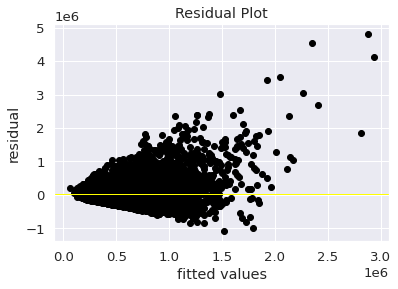

In [ ]:
#Plotting the residual plot: 
plt.scatter(y_pred, residuals, color='black')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='yellow', linewidth=1)
plt.title('Residual Plot')
plt.show()

**Bartlett's Test (heteroskedasticity testing)**

In [ ]:
#Using Barlett test to test if the variances are equal for all samples:
test_result, p_value = sp.stats.bartlett(y_pred, residuals)

degree_of_freedom = len(y_pred)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)

if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')

the variances are homogeneous!


The Residual plot and Bartletts test are similar across all models

# **Performance Analysis**

In [ ]:
#Model Comparison:
Models =  pd.DataFrame({'Model': ['Multiple Linear Regression', 'Quantile Regression', ' Ridge Regression', 
                               'Lasso Regression', 'Elastic Net Regression'],
                     'R-Squared Score': [Lin*100, Qua*100, Ridg*100, Las*100, Elas*100 ]})
Models.sort_values(by = 'R-Squared Score', ascending = False)

,Model,R-Squared Score
4,Elastic Net Regression,55.301200
0,Multiple Linear Regression,55.300707
2,Ridge Regression,55.299839
3,Lasso Regression,55.299839
1,Quantile Regression,53.154105


**Findings**:
 
  - Elastic net regression has a better R^2 score compared to the other models. In as much as the difference between the elastic net and the multiple linear regression is minimal, the fact that elastic net forces the learning algorithm to build a less complex model makes it highly preferrable. 

  This regression also acts as a middle ground between ridge and lasso
  as parameters are set to control the mix ratio.

- The quantile regression on the other hand is handy when:
   -  Estimating the median or any quantile
   -  Key assumptions of linear regression are not satisfied
   -  Outliers are present in the data
   -  Residuals are not normal.
 
- Comparing the coefficient value of Sqft_lot across all the models;

  Linear regression - 1011.03

  Ridge - 0.02

  Lasso - 0.02

  Elastic net - 0.01

  Quantile - 0.00 with a Pvalue of 0.957

 From how the value was minimised across the models suggest that the feature was not good for the algorithm

- The negative coefficient values of sqft_basement and sqft_lot15 suggests that as the price of the house increase, the figure of the 2 variables decreases . The higher the price of the house is, the lower the square footage of the lots and the basements will be.


**Conclusions**


 - The pattern and outliers in the residual plots signifies that we did not completely capture the predictive information of the data in the model.
 
- The high correlation among the features in the data also suggest that Regression may not have been the best algorithim for the data or the models need further improvements.

- The various performance metrics and  overall accuracy score of 55% show that the approaches used did not yield a good predictor model of price hence the metrics for success not achieved.

**Recommendations**:
 - The model can be improved by better handling feature selection or increasing the number of inputs.
 - Exploring other classifiers such as Random Forest or XGBoost
 